# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [4]:
pd.read_csv(filepath_or_buffer=url, sep='\t')

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called chipo.

In [5]:
df_chipo = pd.read_csv(filepath_or_buffer=url, sep='\t')

In [6]:
df_chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [7]:
df_chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [49]:
df_chipo_hist = df_chipo.groupby(by='item_name')['quantity'].sum().sort_values(ascending=False).iloc[:5]

In [50]:
df_chipo_hist

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

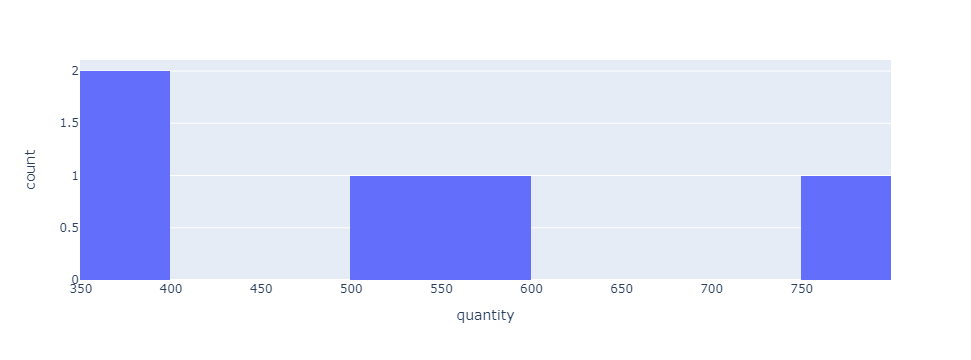

In [51]:
fig = px.histogram(data_frame=df_chipo_plot,x='quantity',nbins=20)
fig.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [74]:
df_chipo['item_price'] = df_chipo['item_price'].apply(lambda x: x.replace('$',''))

In [80]:
df_chipo['item_price'] = df_chipo['item_price'].astype(float)

In [82]:
df_chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [87]:
df_chipo = df_chipo.set_index(keys='item_price')

In [88]:
df_chipo

,order_id,quantity,item_name,choice_description
item_price,,,,
2.39,1,1,Chips and Fresh Tomato Salsa,NaN
3.39,1,1,Izze,[Clementine]
3.39,1,1,Nantucket Nectar,[Apple]
2.39,1,1,Chips and Tomatillo-Green Chili Salsa,NaN
16.98,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."
...,...,...,...,...
11.75,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ..."
11.75,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese..."
11.25,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto..."


In [91]:
df_chipo_scatter = df_chipo.groupby(by='item_name').count()

In [92]:
df_chipo_scatter

,order_id,quantity,choice_description
item_name,,,
6 Pack Soft Drink,54,54,54
Barbacoa Bowl,66,66,66
Barbacoa Burrito,91,91,91
Barbacoa Crispy Tacos,11,11,11
Barbacoa Salad Bowl,10,10,10
Barbacoa Soft Tacos,25,25,25
Bottled Water,162,162,0
Bowl,2,2,2
Burrito,6,6,6


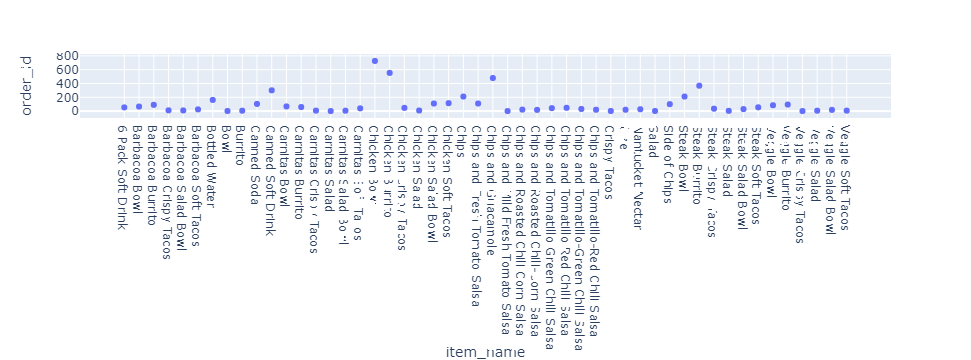

In [94]:
fig2 = px.scatter(data_frame=df_chipo_scatter,y=df_chipo_scatter['order_id'])
fig2.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [95]:
df_chipo = pd.read_csv(filepath_or_buffer=url, sep='\t')

In [96]:
df_chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [100]:
df_chipo['item_price'] = df_chipo['item_price'].apply(lambda x: x.replace('$',''))

In [101]:
df_chipo['item_price'] = df_chipo['item_price'].astype(float)

In [102]:
df_chipo['Sales'] = df_chipo['quantity']*df_chipo['item_price']

In [103]:
df_chipo

,order_id,quantity,item_name,choice_description,item_price,Sales
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [104]:
df_chipo_bar = df_chipo.groupby(by='item_name').sum()

In [105]:
df_chipo_bar

,order_id,quantity,item_price,Sales
item_name,,,,
6 Pack Soft Drink,52322,55,356.95,369.93
Barbacoa Bowl,53972,66,672.36,672.36
Barbacoa Burrito,74718,91,894.75,894.75
Barbacoa Crispy Tacos,5613,12,120.21,138.71
Barbacoa Salad Bowl,9708,10,106.40,106.40
Barbacoa Soft Tacos,18725,25,250.46,250.46
Bottled Water,175944,211,302.56,649.18
Bowl,472,4,29.60,74.00
Burrito,1550,6,44.40,44.40


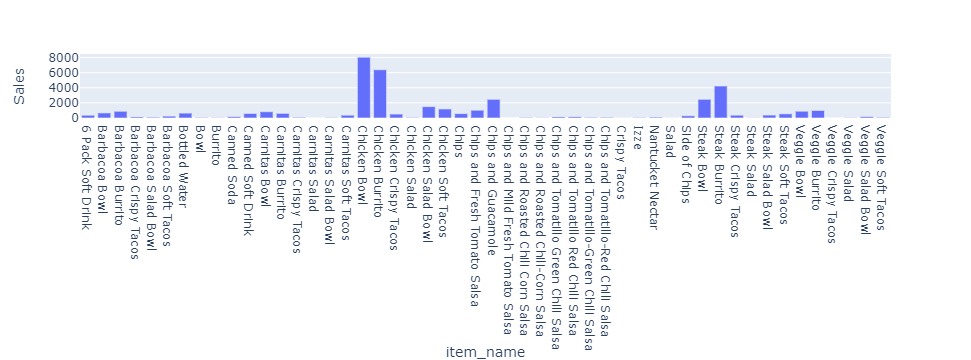

In [108]:
fig3 = px.bar(data_frame=df_chipo_bar,y='Sales')
fig3.show()